In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import calendar
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import geopandas as gpd

In [4]:
_2014_dem_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_2014.10.07_DEM/Gulkana_2014.10.07_DEM.tif'
_2016_dem_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_2016.08.30_DEM/Gulkana_2016.08.30_DEM.tif'
_2021_dem_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_2021.09.19_DEM/Gulkana_2021.09.19_DEM.tif'

with rasterio.open(_2014_dem_path) as src:
        # Read the raster data as a NumPy array
        array_2014 = src.read(1)  # Reads the first band
with rasterio.open(_2016_dem_path) as src:
        # Read the raster data as a NumPy array
        array_2016 = src.read(1)
with rasterio.open(_2021_dem_path) as src:
        # Read the raster data as a NumPy array
        array_2021 = src.read(1)

In [5]:
box = gpd.read_file('/Users/lindsaysummers/Documents/Research/Cautorift/Inputs/Gulkana/Gulkana-outline-UTM.shp')

#make sure crs is the same
if box.crs != src.crs:
    box = box.to_crs(src.crs)

In [6]:
#clip to box
with rasterio.open(_2014_dem_path) as src_2014:
    clipped_2014, transform_2014 = mask(src_2014, box.geometry, crop=True)
with rasterio.open(_2016_dem_path) as src_2016:
    clipped_2016, transform_2016 = mask(src_2016, box.geometry, crop=True)
with rasterio.open(_2021_dem_path) as src_2021:
    clipped_2021, transform_2021 = mask(src_2021, box.geometry, crop=True)

clipped_2014 = clipped_2014.squeeze()
clipped_2021 = clipped_2021.squeeze()
clipped_2016 = clipped_2016.squeeze()

In [7]:
#replace nodata values with nans
clipped_2014 = np.where(clipped_2014 == -32767, np.nan, clipped_2014)
clipped_2016 = np.where(clipped_2016 == -3.4028234663852886e+38, np.nan, clipped_2016)
clipped_2021 = np.where(clipped_2021 == -3.4028234663852886e+38, np.nan, clipped_2021)

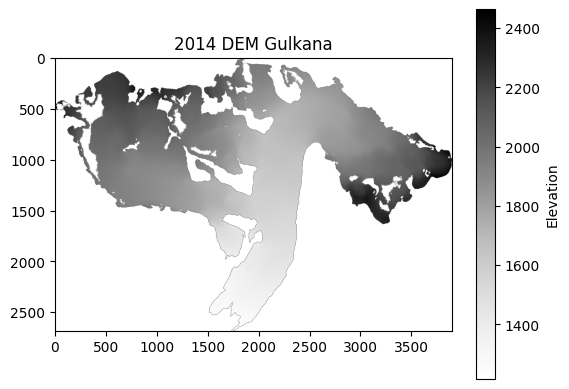

In [8]:
#plot clipped_2014
plt.imshow(clipped_2014, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2014 DEM Gulkana')

plt.show()

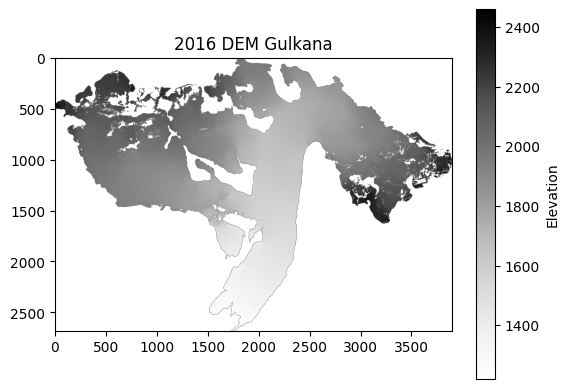

In [9]:
#plot clipped_2016
plt.imshow(clipped_2016, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2016 DEM Gulkana')

plt.show()

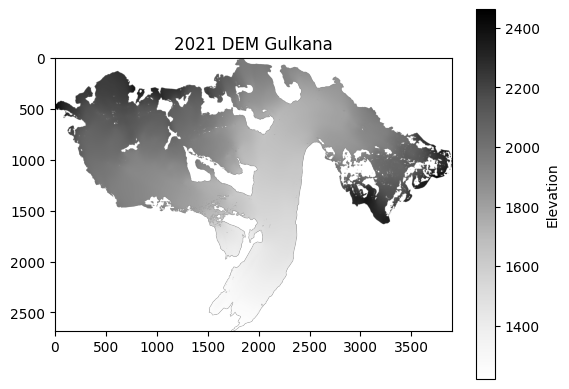

In [10]:
#plot clipped_2021
plt.imshow(clipped_2021, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2021 DEM Gulkana')

plt.show()

In [11]:
#make same shape
print(clipped_2016.shape)
print(clipped_2021.shape)
clipped_2016 = clipped_2016[:-1,:]
print(clipped_2016.shape)
clipped_2021 = clipped_2021[:,:-1]
print(clipped_2021.shape)
clipped_2014.shape
clipped_2014 = clipped_2014[:-1,:]
clipped_2014 = clipped_2014[:,:-1]
clipped_2014.shape

(2680, 3895)
(2679, 3896)
(2679, 3895)
(2679, 3895)


(2679, 3895)

In [12]:
#take the difference and divide to find yearly difference
diff_2021_2016 = clipped_2021 - clipped_2016
elevation_difference = diff_2021_2016 / 5
elevation_difference = elevation_difference.squeeze()

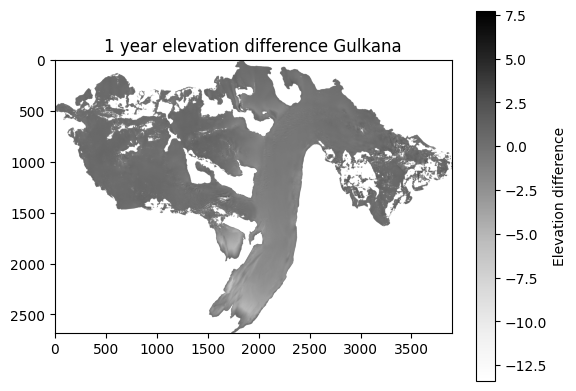

In [13]:
#plot
plt.imshow(elevation_difference, cmap='Greys')
plt.colorbar(label='Elevation difference')
plt.title('1 year elevation difference Gulkana')

plt.show()

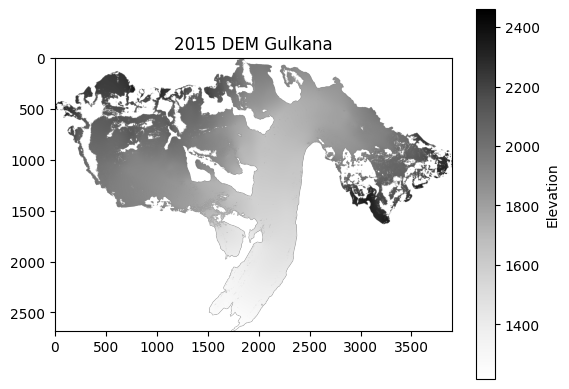

In [14]:
#2015 DEM = 2014 DEM + elevation_difference
array_2015 = clipped_2014 + elevation_difference

#plot
plt.imshow(array_2015, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2015 DEM Gulkana')

plt.show()

In [15]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_DEM_2015.tif'

with rasterio.open(_2014_dem_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2015.shape[0],
    'width': array_2015.shape[1],
    'transform': transform_2014  # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2015.astype(rasterio.float32), 1)

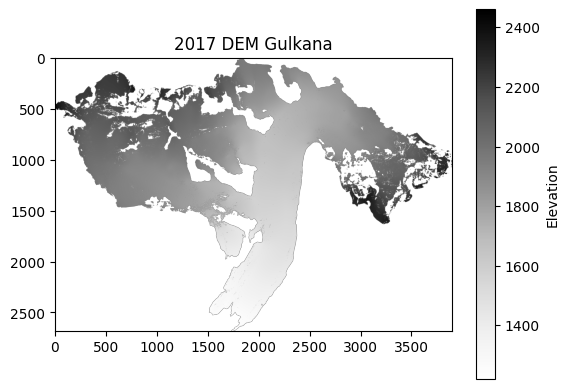

In [16]:
#2017 DEM = 2016 DEM + elevation_difference
array_2017 = clipped_2016 + elevation_difference

#plot
plt.imshow(array_2017, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2017 DEM Gulkana')

plt.show()

#export

In [17]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_DEM_2017.tif'

with rasterio.open(_2014_dem_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2017.shape[0],
    'width': array_2017.shape[1],
    'transform': transform_2014  # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2017.astype(rasterio.float32), 1)

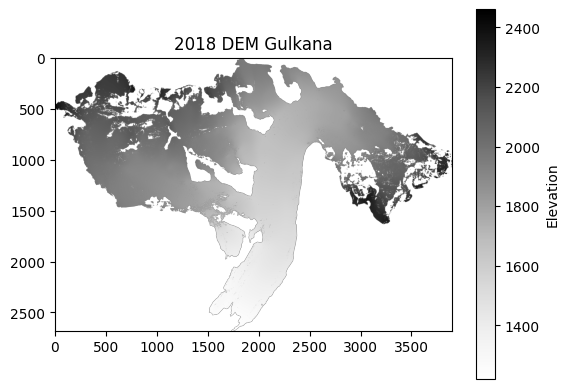

In [18]:
#2018 DEM = 2016 DEM + (elevation_difference * 2)
array_2018 = clipped_2016 + (elevation_difference * 2)

#plot
plt.imshow(array_2018, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2018 DEM Gulkana')

plt.show()

In [19]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_DEM_2018.tif'

with rasterio.open(_2014_dem_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2018.shape[0],
    'width': array_2018.shape[1],
    'transform': transform_2014  # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2018.astype(rasterio.float32), 1)

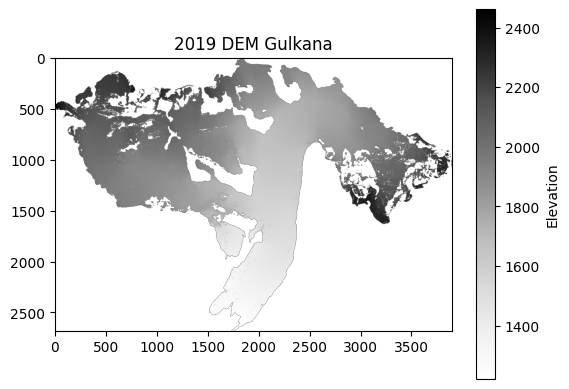

In [20]:
#2019 DEM = 2016 DEM + (elevation_difference * 3)
array_2019 = clipped_2016 + (elevation_difference * 3)

#plot
plt.imshow(array_2019, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2019 DEM Gulkana')

plt.show()

In [21]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_DEM_2019.tif'

with rasterio.open(_2014_dem_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2019.shape[0],
    'width': array_2019.shape[1],
    'transform': transform_2014  # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2019.astype(rasterio.float32), 1)

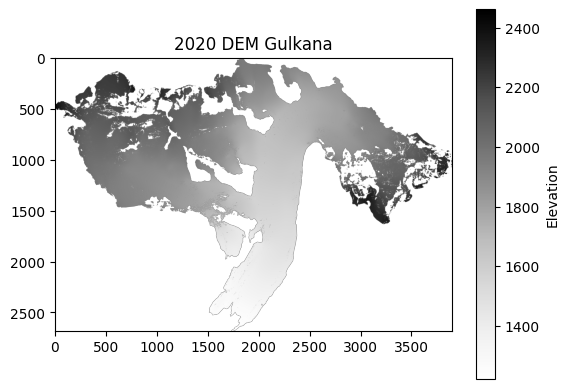

In [22]:
#2020 DEM = 2016 DEM + (elevation_difference * 4)
array_2020 = clipped_2016 + (elevation_difference * 4)

#plot
plt.imshow(array_2020, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2020 DEM Gulkana')

plt.show()

In [23]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_DEM_2020.tif'

with rasterio.open(_2014_dem_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2020.shape[0],
    'width': array_2020.shape[1],
    'transform': transform_2014  # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2020.astype(rasterio.float32), 1)

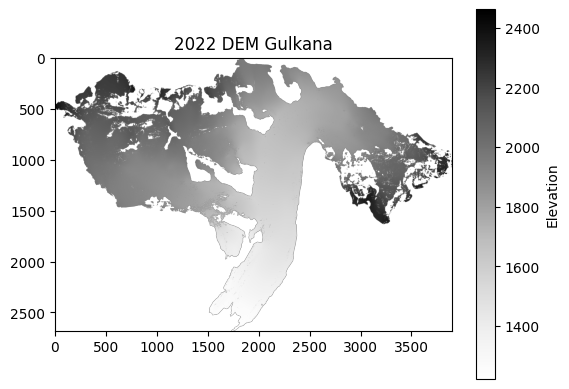

In [24]:
#2022 DEM = 2021 DEM + (elevation_difference)
array_2022 = clipped_2021 + (elevation_difference)

#plot
plt.imshow(array_2022, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2022 DEM Gulkana')

plt.show()

In [25]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_DEM_2022.tif'

with rasterio.open(_2014_dem_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2022.shape[0],
    'width': array_2022.shape[1],
    'transform': transform_2014  # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2022.astype(rasterio.float32), 1)

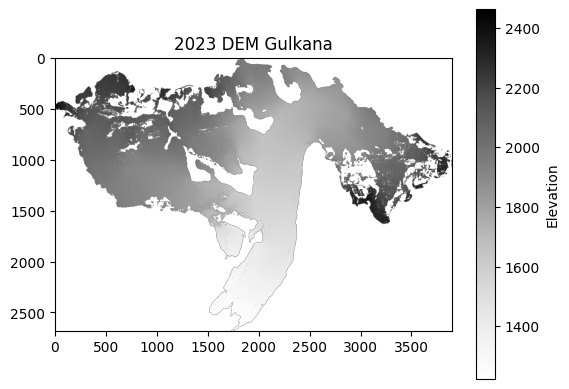

In [26]:
#2023 DEM = 2021 DEM + (elevation_difference * 2)
array_2023 = clipped_2021 + (elevation_difference * 2)

#plot
plt.imshow(array_2023, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2023 DEM Gulkana')

plt.show()

In [27]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_DEM_2023.tif'

with rasterio.open(_2014_dem_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2023.shape[0],
    'width': array_2023.shape[1],
    'transform': transform_2014  # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2023.astype(rasterio.float32), 1)

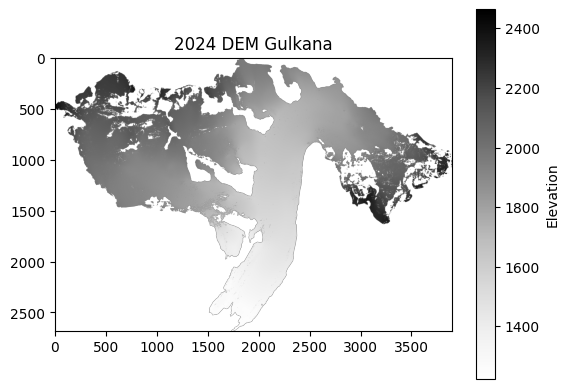

In [28]:
#2024 DEM = 2021 DEM + (elevation_difference * 3)
array_2024 = clipped_2021 + (elevation_difference * 3)

#plot
plt.imshow(array_2024, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2024 DEM Gulkana')

plt.show()

In [29]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Gulkana/Gulkana_DEM_2024.tif'

with rasterio.open(_2014_dem_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2024.shape[0],
    'width': array_2024.shape[1],
    'transform': transform_2014  # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2024.astype(rasterio.float32), 1)